In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [7]:
data = 'Shoe vs Sandal vs Boot Dataset/'
for image_class in os.listdir(data):
    print(image_class)
img_data = tf.keras.utils.image_dataset_from_directory(data)

Boot
Sandal
Shoe
Found 15000 files belonging to 3 classes.


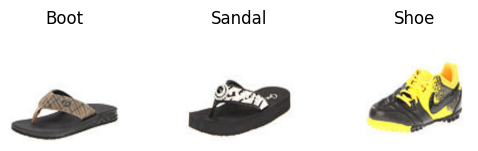

In [8]:
# Alef
for i in range(len(img_data.class_names)):
    for image, label in img_data.take(1):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image[0].numpy().astype('uint8'))
        plt.title(img_data.class_names[i])
        plt.axis('off')


In [9]:
datagen = ImageDataGenerator(rescale=1./255,rotation_range=45,horizontal_flip=True,vertical_flip=True,fill_mode='reflect',validation_split=0.3)
train = datagen.flow_from_directory(data,batch_size=32,target_size=(64,64),class_mode="categorical",subset="training")
test = datagen.flow_from_directory(data,batch_size=32,target_size=(64,64),class_mode="categorical",subset="validation")



Found 10500 images belonging to 3 classes.
Found 4500 images belonging to 3 classes.


In [10]:
# MLP
model_mlp=tf.keras.models.Sequential()
model_mlp.add(layers.Flatten())
model_mlp.add(layers.Dense(100, activation='relu'))
# model_mlp.add(layers.Dropout(0.1))
model_mlp.add(layers.Dense(100, activation='relu'))
# model_mlp.add(layers.Dropout(0.5))
model_mlp.add(layers.Dense(100, activation='relu'))
# model_mlp.add(layers.Dropout(0.5))
model_mlp.add(layers.Dense(100, activation='relu'))
# model_mlp.add(layers.Dropout(0.5))
model_mlp.add(layers.Dense(100, activation='relu'))
# model_mlp.add(layers.Dropout(0.5))
model_mlp.add(layers.Dense(100, activation='relu'))
model_mlp.add(layers.Dense(3, activation='sigmoid'))


In [11]:
model_mlp.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy', tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
callback = keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)
model_mlp.fit(train,epochs=20,batch_size=1024,validation_data=(test),callbacks=[callback])


Epoch 1/20
329/329 [==============================] - 26s 75ms/step - loss: 1.0212 - accuracy: 0.4790 - precision: 0.5701 - recall: 0.1802 - val_loss: 0.9354 - val_accuracy: 0.5651 - val_precision: 0.6148 - val_recall: 0.1933
Epoch 2/20
329/329 [==============================] - 39s 118ms/step - loss: 0.8876 - accuracy: 0.5841 - precision: 0.5966 - recall: 0.4895 - val_loss: 0.8319 - val_accuracy: 0.6193 - val_precision: 0.6226 - val_recall: 0.6002
Epoch 3/20
329/329 [==============================] - 49s 149ms/step - loss: 0.8550 - accuracy: 0.6049 - precision: 0.5967 - recall: 0.5952 - val_loss: 0.8299 - val_accuracy: 0.6240 - val_precision: 0.5768 - val_recall: 0.6862
Epoch 4/20
329/329 [==============================] - 54s 165ms/step - loss: 0.8036 - accuracy: 0.6371 - precision: 0.5953 - recall: 0.6962 - val_loss: 0.7092 - val_accuracy: 0.6996 - val_precision: 0.6369 - val_recall: 0.7538
Epoch 5/20
329/329 [==============================] - 45s 138ms/step - loss: 0.7558 - accurac

In [12]:
model_mlp.save('model_mlp.h5')

number of paratemers for MLP: 1279703
141/141 [==============================] - 7s 47ms/step


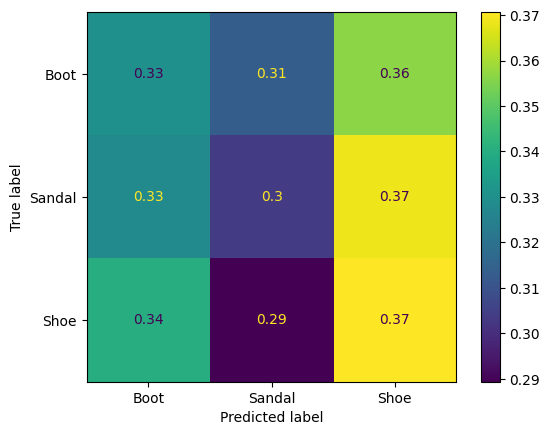

In [13]:
print("number of paratemers for MLP: " + str(model_mlp.count_params()))

Y_pred = model_mlp.predict(test)
y_pred = np.argmax(Y_pred, axis=1)
confusion_matrix = confusion_matrix(test.classes, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=img_data.class_names)
disp.plot()
plt.show()


<div style="direction:rtl">
همانطور  که شخص است در اینجا برای کم شدن حجم پردازش و کوچکتر شدن مدلها تصاویر را به ابعاد 64 در 64 تبدیل کرده ایم.

مدل MLP استفاده شده در اینجا یک مدل با 6 لایه که هر کدام 100 نرون دارد و تابع فعالسازی هم از نوع ReLu است. تعداد نرونها به صورت تصادفی و با آزمون و خطا بدست آمده است. همچنین تابع فعالسازی هم برای کم شدن حجم محاسبات انتخاب شده است.
همانطور که مشخص است نتایج برای مدل در بهترین وضعیت برای داده های تست به صورت زیر است:

Accuracy=0.7760

Precision=0.6614

Recall=0.8802

همچنین با چند بار آزمون و خطا برای این مدل دیدم که اضافه کردن لایه dropout چیزی به دقت مدل اضافه نکردو بنابراین از dropout استفاده نکردم.

تعداد پارامترها مدل در بالا محاسبه شده و عدد 1279703 بدست آمده است.
</div>

In [24]:
# Tensorboard
# MLP
model_tb=tf.keras.models.Sequential()
model_tb.add(layers.Flatten())
model_tb.add(layers.Dense(100, activation='relu'))
# model_tb.add(layers.Dropout(0.1))
model_tb.add(layers.Dense(100, activation='relu'))
# model_tb.add(layers.Dropout(0.5))
model_tb.add(layers.Dense(100, activation='relu'))
# model_tb.add(layers.Dropout(0.5))
model_tb.add(layers.Dense(100, activation='relu'))
# model_tb.add(layers.Dropout(0.5))
model_tb.add(layers.Dense(100, activation='relu'))
# model_tb.add(layers.Dropout(0.5))
model_tb.add(layers.Dense(100, activation='relu'))
model_tb.add(layers.Dense(3, activation='sigmoid'))


model_tb.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy', tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")
callback = keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)
model_tb.fit(train,epochs=20,batch_size=1024,validation_data=(test),callbacks=[callback, tensorboard_callback])


Epoch 1/20
329/329 [==============================] - 86s 256ms/step - loss: 1.0358 - accuracy: 0.4664 - precision_3: 0.5018 - recall_3: 0.3525 - val_loss: 0.9295 - val_accuracy: 0.5580 - val_precision_3: 0.5447 - val_recall_3: 0.6013
Epoch 2/20
329/329 [==============================] - 25s 76ms/step - loss: 0.9185 - accuracy: 0.5657 - precision_3: 0.5179 - recall_3: 0.6830 - val_loss: 0.9169 - val_accuracy: 0.5902 - val_precision_3: 0.5185 - val_recall_3: 0.7224
Epoch 3/20
329/329 [==============================] - 44s 134ms/step - loss: 0.8769 - accuracy: 0.5922 - precision_3: 0.5273 - recall_3: 0.7239 - val_loss: 0.8285 - val_accuracy: 0.6144 - val_precision_3: 0.5142 - val_recall_3: 0.7936
Epoch 4/20
329/329 [==============================] - 36s 108ms/step - loss: 0.8505 - accuracy: 0.6045 - precision_3: 0.5302 - recall_3: 0.7699 - val_loss: 0.8249 - val_accuracy: 0.6033 - val_precision_3: 0.5302 - val_recall_3: 0.7764
Epoch 5/20
329/329 [==============================] - 44s 132

In [ ]:
from tensorboard import program
tb = program.TensorBoard()
tb.configure(argv=[None, '--logdir', 'D:/doctora/DeepL/HW3/logs', '--port', '6012'])
url = tb.launch()
print(f"Tensorflow listening on {url}")


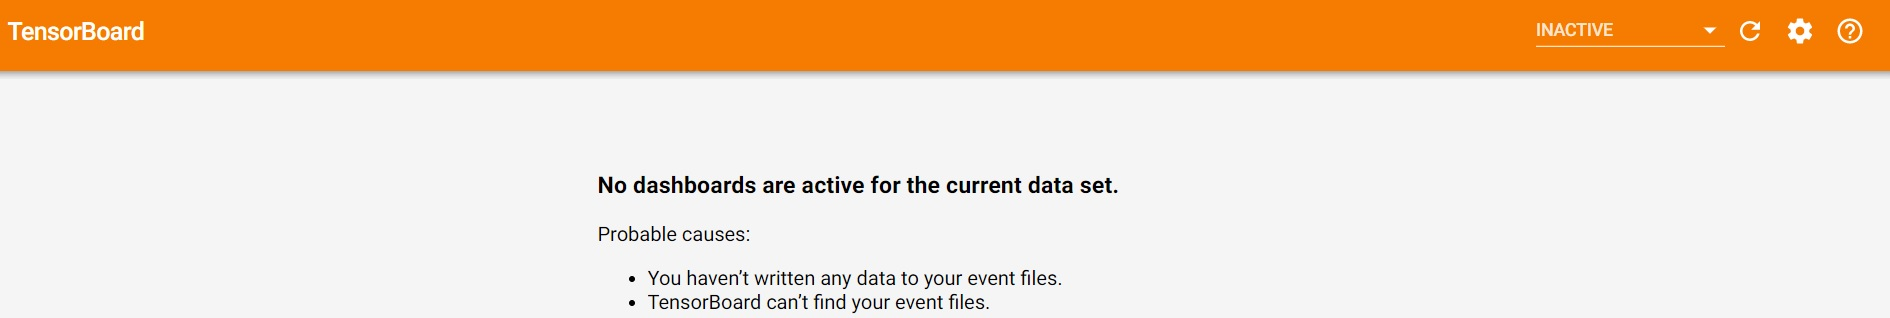

In [18]:
# from IPython import display
# display.Image("./tensorboard.jpg")

<div style="direction:rtl">
در اینجا مدل را دوباره با استفاده از ابزار tensorboard آموزش داده و سعی کردم آن را اجرا کنم. که تنسوربورد با اجرا در مرورگر خطای بالا را میداد و به درستی اجرا نمی شد..

</div>

In [14]:
# CNN
model_cnn=tf.keras.models.Sequential()
model_cnn.add(layers.Conv2D(8,(3,3),input_shape=[64,64,3],activation='relu'))
model_cnn.add(layers.MaxPooling2D(2,2))
model_cnn.add(layers.Conv2D(8,(3,3),activation='relu'))
model_cnn.add(layers.MaxPooling2D(2,2))
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(100, activation='relu'))
model_cnn.add(layers.Dense(3, activation='sigmoid'))

In [15]:
model_cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy', tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
callback = keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)
model_cnn.fit(train,epochs=20,batch_size=1024,validation_data=(test),callbacks=[callback])

Epoch 1/20
329/329 [==============================] - 48s 144ms/step - loss: 0.8029 - accuracy: 0.6209 - precision_1: 0.5886 - recall_1: 0.6382 - val_loss: 0.5926 - val_accuracy: 0.7242 - val_precision_1: 0.6099 - val_recall_1: 0.8618
Epoch 2/20
329/329 [==============================] - 47s 143ms/step - loss: 0.5416 - accuracy: 0.7642 - precision_1: 0.6434 - recall_1: 0.8284 - val_loss: 0.4934 - val_accuracy: 0.7884 - val_precision_1: 0.6398 - val_recall_1: 0.8713
Epoch 3/20
329/329 [==============================] - 32s 96ms/step - loss: 0.4673 - accuracy: 0.8029 - precision_1: 0.6740 - recall_1: 0.8255 - val_loss: 0.4109 - val_accuracy: 0.8207 - val_precision_1: 0.6947 - val_recall_1: 0.8147
Epoch 4/20
329/329 [==============================] - 40s 121ms/step - loss: 0.4178 - accuracy: 0.8314 - precision_1: 0.6958 - recall_1: 0.8263 - val_loss: 0.3580 - val_accuracy: 0.8551 - val_precision_1: 0.6812 - val_recall_1: 0.8596
Epoch 5/20
329/329 [==============================] - 47s 142

In [23]:
model_cnn.save('model_cnn.h5')

number of paratemers for CNN: 158011
141/141 [==============================] - 9s 61ms/step


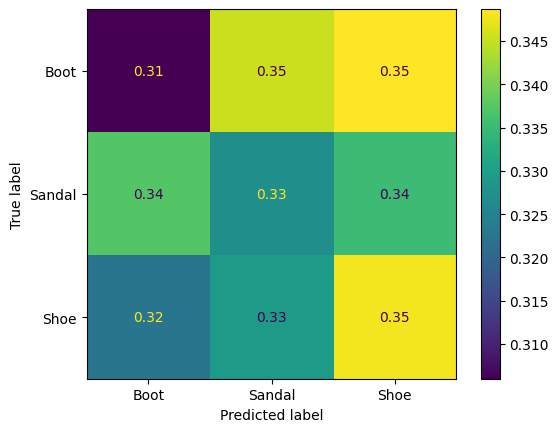

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print("number of paratemers for CNN: " + str(model_cnn.count_params()))

Y_pred = model_cnn.predict(test)
y_pred = np.argmax(Y_pred, axis=1)
confusion_matrix = confusion_matrix(test.classes, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=img_data.class_names)
disp.plot()
plt.show()


<div style="direction:rtl">
در اینجا برای طراحی مدل CNN از دو لایه conv2d و دو لایه pooling برای تست استفاده کردم و سپس خروجی را flat کرده و یک لایه dense هم اضافه کردم.

می توان مدل را پیچیده تر کرد ولی محاسبات انجام شده در بالا نشان داد که همین مدل هم می تواند بسیار موثرتر از MLP در این مثال باشد.

نتایج این مدل به صورت زیر است:


Accuracy=0.9289

Precision=0.7309

Recall=0.9564

مشاهده می شود که مدل بسیار بهتر عمل کرده است. با اینکه تعداد لایه ها زیاد نیست و پارامتر ها هم بسیار کمتر است.

تعداد پارامترها مدل در بالا محاسبه شده و عدد 158011 بدست آمده است. تعداد پارامترهای این مدل در حد یک هشتم مدل MLP است.

</div>

In [ ]:
# # # MLP using block dropout
# model_mlp_2=tf.keras.models.Sequential()
# model_mlp_2.add(layers.Flatten())
# model_mlp_2.add(layers.Dense(100, activation='relu'))
# # model_mlp_2.add(layers.Dropout(0.1))
# model_mlp_2.add(layers.Dense(100, activation='relu'))
# # model_mlp_2.add(layers.Dropout(0.5))
# model_mlp_2.add(layers.Dense(100, activation='relu'))
# # model_mlp_2.add(layers.Dropout(0.5))
# model_mlp_2.add(layers.Dense(100, activation='relu'))
# # model_mlp_2.add(layers.Dropout(0.5))
# model_mlp_2.add(layers.Dense(100, activation='relu'))
# # model_mlp_2.add(layers.Dropout(0.5))
# model_mlp_2.add(layers.Dense(100, activation='relu'))
# model_mlp_2.add(layers.Dense(3, activation='sigmoid'))

<class 'numpy.ndarray'>


In [ ]:
# model_mlp_2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy', tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
# callback = keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)
# model_mlp_2.fit(train,epochs=20,batch_size=1024,validation_data=(test),callbacks=[callback])

In [ ]:
# print("number of paratemers for MLP using block dropout: " + str(model_mlp_2.count_params()))

# Y_pred = model_mlp_2.predict(test)
# y_pred = np.argmax(Y_pred, axis=1)
# confusion_matrix = confusion_matrix(test.classes, y_pred, normalize='true')
# disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=img_data.class_names)
# disp.plot()
# plt.show()

In [19]:
# CNN with kernel factorization
model_cnn_2=tf.keras.models.Sequential()
model_cnn_2.add(layers.SeparableConv2D(8,(3,3),input_shape=[64,64,3],activation='relu'))
model_cnn_2.add(layers.MaxPooling2D(2,2))
model_cnn_2.add(layers.SeparableConv2D(8,(3,3),activation='relu'))
model_cnn_2.add(layers.MaxPooling2D(2,2))
model_cnn_2.add(layers.Flatten())
model_cnn_2.add(layers.Dense(100, activation='relu'))
model_cnn_2.add(layers.Dense(3, activation='sigmoid'))

In [20]:
model_cnn_2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy', tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
callback = keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)
model_cnn_2.fit(train,epochs=20,batch_size=1024,validation_data=(test),callbacks=[callback])

Epoch 1/20
329/329 [==============================] - 59s 177ms/step - loss: 0.7895 - accuracy: 0.6362 - precision_2: 0.4709 - recall_2: 0.9166 - val_loss: 0.5933 - val_accuracy: 0.7296 - val_precision_2: 0.5175 - val_recall_2: 0.9729
Epoch 2/20
329/329 [==============================] - 43s 131ms/step - loss: 0.5490 - accuracy: 0.7549 - precision_2: 0.5400 - recall_2: 0.9681 - val_loss: 0.4993 - val_accuracy: 0.7782 - val_precision_2: 0.5485 - val_recall_2: 0.9756
Epoch 3/20
329/329 [==============================] - 41s 124ms/step - loss: 0.4551 - accuracy: 0.8138 - precision_2: 0.5540 - recall_2: 0.9774 - val_loss: 0.4135 - val_accuracy: 0.8318 - val_precision_2: 0.5292 - val_recall_2: 0.9831
Epoch 4/20
329/329 [==============================] - 39s 120ms/step - loss: 0.4003 - accuracy: 0.8398 - precision_2: 0.5532 - recall_2: 0.9809 - val_loss: 0.3571 - val_accuracy: 0.8642 - val_precision_2: 0.5646 - val_recall_2: 0.9789
Epoch 5/20
329/329 [==============================] - 32s 97

number of paratemers for CNN with kernel factorization: 157406
141/141 [==============================] - 8s 55ms/step


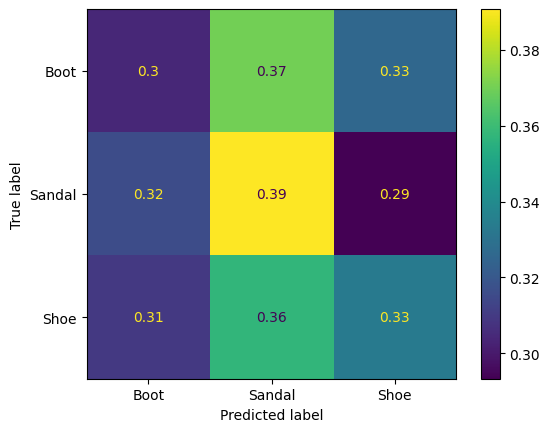

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print("number of paratemers for CNN with kernel factorization: " + str(model_cnn_2.count_params()))

Y_pred = model_cnn_2.predict(test)
y_pred = np.argmax(Y_pred, axis=1)
confusion_matrix = confusion_matrix(test.classes, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=img_data.class_names)
disp.plot()
plt.show()

<div style="direction:rtl">
در اینجا برای لایه های conv از SeparableConv2D استفاده کردیم. این باعث می شود که کرنل ها به دو قسمت شکسته شود و هر کرنل با استفاده از دو کرنل مجزا اجرا شود.

این روش دو مزیت دارد. اولین مزیت اینکه تعداد پارامترها کمتر می شود. در اینجا تعداد پارامترها 157406 شده است که مقداری از حالت قبل کمتر است. البته اگر شبکه پیچیده تر بود این کاهش تعداد پارامترها قابل توجه تر بود.

مزیت دوم این است که شبکه غیر خطی تر می شود. دلیلش هم این است که دو بار از تابع فعالیت استفاده می شود.

در اینجا دقت این مدل به صورت زیر است:

Accuracy=0.9158

Precision=0.6179

Recall=0.9853

</div>